<a href="https://colab.research.google.com/github/quickgrid/CodeLab/blob/master/computer_vision/Keras_Pretrained_Classification_Model_Inference_with_h5_tflite_Quantized_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download image and perform inference with various models

**WARNING: RESIZE IMAGE KEEPING ASPECT RATIO THEN FILL REST TO MATCH INPUT SHAPE OTHERWISE RESULT MAY NOT BE GOOD**

Imagenet classes, https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

In [1]:
!wget "https://i.ytimg.com/vi/P-0PB4cbtDc/maxresdefault.jpg" -O "seatbelt1.jpg"
!wget "https://ichef.bbci.co.uk/news/1024/media/images/77898000/jpg/_77898940_hi024115134.jpg" -O "seatbelt_without1.jpg"
!wget "http://blindnewworld.org/wp-content/uploads/2018/01/Adam-pic-1-1024x680.jpg" -O "seatbelt_without2.jpg"
!wget "http://4.bp.blogspot.com/-RWVT5eFRUFo/UMQO0Z8Sg0I/AAAAAAAAMWc/DmW6CpjZAEA/s1600/Equus_Hyundai_+2013_Wallpaper_Interior-rear-front-seats-sunroof.jpg" -O "seatbelt_without3.jpg"

--2020-09-10 08:42:21--  https://i.ytimg.com/vi/P-0PB4cbtDc/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 172.217.203.119, 2607:f8b0:400c:c07::77
Connecting to i.ytimg.com (i.ytimg.com)|172.217.203.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114572 (112K) [image/jpeg]
Saving to: ‘seatbelt1.jpg’

seatbelt1.jpg       100%[===================>] 111.89K  --.-KB/s    in 0.001s  

2020-09-10 08:42:21 (75.8 MB/s) - ‘seatbelt1.jpg’ saved [114572/114572]

--2020-09-10 08:42:21--  https://ichef.bbci.co.uk/news/1024/media/images/77898000/jpg/_77898940_hi024115134.jpg
Resolving ichef.bbci.co.uk (ichef.bbci.co.uk)... 172.224.107.7, 2600:1402:a:198::f33, 2600:1402:a:180::f33, ...
Connecting to ichef.bbci.co.uk (ichef.bbci.co.uk)|172.224.107.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81419 (80K) [image/jpeg]
Saving to: ‘seatbelt_without1.jpg’

seatbelt_without1.j 100%[===================>]  79.51K  --.-KB/s    in 0.05s   



In [2]:
test_filename = 'seatbelt1.jpg'

In [3]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = test_filename
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n04162706', 'seat_belt', 0.983633), ('n03868863', 'oxygen_mask', 0.0030835597), ('n03141823', 'crutch', 0.0019459919)]


In [4]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

model = MobileNetV2(weights='imagenet')

img_path = test_filename
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])


14540800/14536120 [==============================] - 0s 0us/step
Predicted: [('n04162706', 'seat_belt', 0.97151357), ('n03868863', 'oxygen_mask', 0.0032173472), ('n03769881', 'minibus', 0.0019883676)]


# Model saving reloading and prediction

In [5]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow import keras

model = MobileNetV2(weights='imagenet')

img_path = test_filename
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


In [6]:
model.save("my_model.h5")

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_model.h5", compile=False)

In [7]:
preds = reconstructed_model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)

print(preds.shape)
print("\n")

print('Predicted:', decode_predictions(preds, top=5)[0])

(1, 1000)


Predicted: [('n04162706', 'seat_belt', 0.97151357), ('n03868863', 'oxygen_mask', 0.0032173472), ('n03769881', 'minibus', 0.0019883676), ('n02669723', 'academic_gown', 0.0012057559), ('n03763968', 'military_uniform', 0.0011879808)]


# Convert to Tflite model an perform inference

In [8]:
import tensorflow as tf

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [9]:
## Convert and save regular model

tflite_model = converter.convert()

# Save the model.
with open('unoptimized_model.tflite', 'wb') as f:
  f.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmppxy8nry4/assets


In [10]:
optimize="Speed"
if optimize=='Speed':
    converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]
elif optimize=='Storage':
     converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
else:    
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
#reduce the size of a floating point model by quantizing the weights to float16
converter.target_spec.supported_types = [tf.float16]
tflite_quant_model = converter.convert()
#save the quanitized model toa binary file
open("model_quant_tl.tflite", "wb").write(tflite_quant_model)

INFO:tensorflow:Assets written to: /tmp/tmplffgp5an/assets


INFO:tensorflow:Assets written to: /tmp/tmplffgp5an/assets


7031872

In [11]:
#import tflite_runtime.interpreter as tflite
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_quant_model)
#allocate the tensors
interpreter.allocate_tensors()

In [12]:
#get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [13]:
print(input_details)
print("\n")
print(output_details)

[{'name': 'input_3', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


[{'name': 'Identity', 'index': 178, 'shape': array([   1, 1000], dtype=int32), 'shape_signature': array([  -1, 1000], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [14]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [16]:
import cv2

# Read the image and decode to a tensor
image_path = test_filename 
img = cv2.imread(image_path)
img = cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT))

img_back = img

img = (img[...,::-1].astype(np.float32)) / 255.0


#Preprocess the image to required size and cast
input_shape = input_details[0]['shape']

input_tensor= np.array(np.expand_dims(img,0), dtype=np.float32)


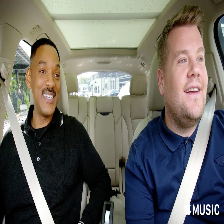

In [17]:
from google.colab.patches import cv2_imshow
cv2_imshow(img_back)

# Get imagenet labels as text and show

In [59]:
!wget "https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt" -O "imagenet_labels.txt"

--2020-09-10 07:19:08--  https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30564 (30K) [text/plain]
Saving to: ‘imagenet_labels.json’

imagenet_labels.jso 100%[===================>]  29.85K  --.-KB/s    in 0.01s   

2020-09-10 07:19:08 (2.20 MB/s) - ‘imagenet_labels.json’ saved [30564/30564]



In [58]:
with open('imagenet_label.txt') as f:
  print(f.read())

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

# Get imagenet json labels

In [18]:
!wget "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json" -O "tmp.json"

--2020-09-10 08:44:05--  https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.113.133
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.113.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [application/octet-stream]
Saving to: ‘tmp.json’

tmp.json            100%[===================>]  34.53K  --.-KB/s    in 0.01s   

2020-09-10 08:44:05 (2.46 MB/s) - ‘tmp.json’ saved [35363/35363]



In [19]:
import json

with open('tmp.json') as json_file:   

  data = json.load(json_file)
  print(data)


{'0': ['n01440764', 'tench'], '1': ['n01443537', 'goldfish'], '2': ['n01484850', 'great_white_shark'], '3': ['n01491361', 'tiger_shark'], '4': ['n01494475', 'hammerhead'], '5': ['n01496331', 'electric_ray'], '6': ['n01498041', 'stingray'], '7': ['n01514668', 'cock'], '8': ['n01514859', 'hen'], '9': ['n01518878', 'ostrich'], '10': ['n01530575', 'brambling'], '11': ['n01531178', 'goldfinch'], '12': ['n01532829', 'house_finch'], '13': ['n01534433', 'junco'], '14': ['n01537544', 'indigo_bunting'], '15': ['n01558993', 'robin'], '16': ['n01560419', 'bulbul'], '17': ['n01580077', 'jay'], '18': ['n01582220', 'magpie'], '19': ['n01592084', 'chickadee'], '20': ['n01601694', 'water_ouzel'], '21': ['n01608432', 'kite'], '22': ['n01614925', 'bald_eagle'], '23': ['n01616318', 'vulture'], '24': ['n01622779', 'great_grey_owl'], '25': ['n01629819', 'European_fire_salamander'], '26': ['n01630670', 'common_newt'], '27': ['n01631663', 'eft'], '28': ['n01632458', 'spotted_salamander'], '29': ['n01632777', 

# Do inference on quantized model

In [20]:
#set the tensor to point to the input data to be inferred
input_index = interpreter.get_input_details()[0]["index"]
interpreter.set_tensor(input_index, input_tensor)
#Run the inference
interpreter.invoke()
output_details = interpreter.get_output_details()

In [21]:
output_data = interpreter.get_tensor(output_details[0]['index'])
results = np.squeeze(output_data)

print(results)

[2.56792446e-05 3.49218681e-05 8.59863576e-05 8.40606299e-06
 4.09719651e-05 3.74539450e-05 7.91662751e-06 1.91031140e-05
 1.47453075e-05 2.32361072e-05 3.63506952e-05 1.20927425e-05
 1.88775484e-05 1.94426029e-05 3.47384812e-05 3.20146755e-05
 8.98062626e-06 2.20253041e-05 5.99539453e-05 1.57151262e-05
 2.49778932e-05 8.35139235e-06 4.38343050e-05 2.79387477e-05
 2.76637256e-05 1.69215000e-05 1.64100475e-05 1.37514144e-05
 1.92473235e-05 2.26516095e-05 3.45318076e-05 1.82614640e-05
 2.38225275e-05 1.07257210e-05 2.55276373e-05 2.51192632e-05
 2.00925369e-05 2.29024081e-05 1.61598873e-05 6.88488071e-05
 1.15016110e-05 4.00652198e-06 2.93773664e-05 3.14693034e-06
 4.87690659e-06 1.66404352e-05 7.59023396e-06 2.25235272e-05
 2.23622537e-05 1.55943762e-05 1.80295717e-06 2.69627380e-05
 2.01701168e-05 3.37265083e-05 2.11886381e-05 4.71945677e-05
 7.41721815e-05 3.53763221e-06 1.66023910e-05 1.70279382e-05
 1.16834808e-05 3.36587764e-05 2.38900539e-05 9.17866691e-06
 1.87655707e-04 6.933515

In [22]:
## In ascending order
#top_k = results.argsort()

## In descening order get top N
n = 5
top_k = results.argsort()[::-1][:n]


print(top_k)

[785 691 652 438 654]


In [23]:
for i in range(0, n):
  print(data[str(top_k[i])])

['n04162706', 'seat_belt']
['n03868863', 'oxygen_mask']
['n03763968', 'military_uniform']
['n02815834', 'beaker']
['n03769881', 'minibus']


In [24]:
print(results.argsort()[-5:][::-1])

[785 691 652 438 654]


In [25]:
def custom_decode_predictions(preds, top=5):

  if len(preds.shape) != 2 or preds.shape[1] != 1000:
    raise ValueError('`decode_predictions` expects '
                     'a batch of predictions '
                     '(i.e. a 2D array of shape (samples, 1000)). '
                     'Found array with shape: ' + str(preds.shape))
  results = []
  for pred in preds:
    top_indices = pred.argsort()[-top:][::-1]
    result = [tuple(data[str(i)]) + (pred[i],) for i in top_indices]
    result.sort(key=lambda x: x[2], reverse=True)
    results.append(result)
  return results

In [26]:
print('Predicted:', custom_decode_predictions(np.array([results]), top=5)[0])

Predicted: [('n04162706', 'seat_belt', 0.92117506), ('n03868863', 'oxygen_mask', 0.009071158), ('n03763968', 'military_uniform', 0.0028622744), ('n02815834', 'beaker', 0.0023603127), ('n03769881', 'minibus', 0.0022293988)]


In [27]:
print(np.array([results]).shape)

print(preds.shape)

(1, 1000)
(1, 1000)


# Do inference on unquantized model

In [28]:

#import tflite_runtime.interpreter as tflite
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path='unoptimized_model.tflite')
#allocate the tensors
interpreter.allocate_tensors()

In [29]:
#get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [30]:
print(input_details)
print("\n")
print(output_details)

[{'name': 'input_3', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


[{'name': 'Identity', 'index': 178, 'shape': array([   1, 1000], dtype=int32), 'shape_signature': array([  -1, 1000], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [31]:
#set the tensor to point to the input data to be inferred
input_index = interpreter.get_input_details()[0]["index"]
interpreter.set_tensor(input_index, input_tensor)
#Run the inference
interpreter.invoke()
output_details = interpreter.get_output_details()

In [32]:
output_data = interpreter.get_tensor(output_details[0]['index'])
results = np.squeeze(output_data)

print(results)

[2.54545212e-05 3.49312468e-05 8.70177246e-05 8.56601037e-06
 3.97824406e-05 3.61448219e-05 7.85333759e-06 1.85850822e-05
 1.45287595e-05 2.31313606e-05 3.61975290e-05 1.22307547e-05
 1.86903580e-05 1.95112061e-05 3.43765678e-05 3.13343880e-05
 9.37433651e-06 2.21287119e-05 5.88725161e-05 1.58131388e-05
 2.44332641e-05 8.32692422e-06 4.24937061e-05 2.71316494e-05
 2.71779518e-05 1.70063104e-05 1.58858111e-05 1.37469888e-05
 1.96473266e-05 2.28857807e-05 3.39853723e-05 1.80437801e-05
 2.40580412e-05 1.04289056e-05 2.58021664e-05 2.44403491e-05
 1.98187663e-05 2.29689358e-05 1.61207954e-05 6.86171188e-05
 1.16093033e-05 4.00549243e-06 2.91527085e-05 3.00146303e-06
 4.84990551e-06 1.63784243e-05 7.53438781e-06 2.23613679e-05
 2.18223995e-05 1.54695008e-05 1.79005542e-06 2.69505108e-05
 2.00684917e-05 3.41664127e-05 2.07620851e-05 4.73211876e-05
 7.57240414e-05 3.51588596e-06 1.67370818e-05 1.67788257e-05
 1.21473386e-05 3.41446539e-05 2.42695187e-05 9.24577398e-06
 1.86241436e-04 6.891314

In [33]:
## In ascending order
#top_k = results.argsort()

## In descening order get top N
n = 5
top_k = results.argsort()[::-1][:n]


print(top_k)

[785 691 652 438 743]


In [34]:
for i in range(0, n):
  print(data[str(top_k[i])])

['n04162706', 'seat_belt']
['n03868863', 'oxygen_mask']
['n03763968', 'military_uniform']
['n02815834', 'beaker']
['n04005630', 'prison']


In [35]:
print('Predicted:', custom_decode_predictions(np.array([results]), top=5)[0])

Predicted: [('n04162706', 'seat_belt', 0.9216095), ('n03868863', 'oxygen_mask', 0.009126302), ('n03763968', 'military_uniform', 0.0029996033), ('n02815834', 'beaker', 0.0022711486), ('n04005630', 'prison', 0.0022373218)]
